# Analyse clusters in an online customer survey

This is a demonstration of how you can load a CSV of lots of customer survey responses, cluster them, plot bar charts of common themes,
and even assign topic descriptions to those clusters by using OpenAI.

In [ ]:
import harmony
from harmony import create_instrument_from_list, match_instruments
import pandas as pd
import re
import json
import pickle as pkl

In [2]:
survey_response_csv = """customer_id,response
1001,The bakery section is fantastic! Always fresh bread and the staff are very friendly and helpful.
1002,Pricing is a bit high compared to competitors. I only shop here for specific sale items.
1003,I wish they had more organic produce options. The current selection is quite limited.
1004,"Checkout lines are consistently long, even during off-peak hours. Need more cashiers open."
1005,The store is always clean and well-organized. It makes my weekly shop much less stressful.
1006,I had trouble finding the specific brand of cereal I needed. The aisle signage could be clearer.
1007,"Great selection of international foods, which is why I keep coming back despite the distance."
1008,The self-checkout machines break down too often. It’s frustrating when you have a small order.
1009,The deli counter staff are knowledgeable and polite. Excellent quality meats and cheeses.
1010,"Parking lot is a nightmare, especially on weekends. It needs better traffic management."
1011,Their own-brand products are surprisingly good quality and very reasonably priced.
1012,Found expired milk last week. Staff need to be more diligent about checking dates.
1013,Love the floral department! Always beautiful bouquets and competitive prices.
1014,Customer service desk was unhelpful when I tried to return an item. Poor experience.
1015,"The meat department always has a great variety of cuts, though it can be slightly expensive."
1016,I appreciate the quiet hours they offer; it's much easier for sensory-sensitive shoppers.
1017,My loyalty card points never seem to load correctly. It's a hassle every time I shop.
1018,The fresh fruit and vegetables are consistently ripe and last a long time after purchase.
1019,The lighting in the store is too harsh. It feels less inviting than other supermarkets.
1020,They need to stock more vegan and plant-based alternatives in the frozen section.
1021,"The store layout changed recently, and now it's confusing to navigate. Please revert!"
1022,I enjoy the samples they offer on Saturdays; it introduces me to new products.
1023,"The prices are competitive, but the store sometimes runs out of advertised weekly deals quickly."
1024,The bathroom facilities were not clean during my last visit. Management should address this.
1025,Best store for seafood in the area. Always fresh and high-quality.
1026,Staff are often hard to find when I need assistance in an aisle.
1027,Love the new 'click and collect' service! It saves me so much time.
1028,The music played in the store is too loud and distracting.
1029,"Excellent baked goods, especially the artisan bread. Keep up the good work!"
1030,They really need better security in the parking lot; I've noticed suspicious activity.
1031,I wish there were more express checkouts for people with 10 items or less.
1032,The pet food aisle is poorly organized. It's tough to find my usual brand quickly.
1033,Friendly cashier named Sarah always makes my day! Great customer service.
1034,"The self-serve coffee station is a nice touch, but it's often messy."
1035,Highly recommend this supermarket for its fresh prepared meals section.
1036,"They stopped carrying my favorite pasta sauce, which is a major disappointment."
1037,The fresh juice bar is a great addition! Love the daily blends.
1038,The trolleys are dirty and many have broken wheels. Time for an upgrade.
1039,"Value is excellent, but the general tidiness of the store could be improved."
1040,The store hours are inconvenient. I wish they stayed open later on weeknights.
1041,Fantastic staff—a young man helped me carry my groceries to the car in the rain.
1042,The frozen food section always feels like a maze. Need clearer labeling.
1043,I appreciate the effort they put into seasonal displays and product offerings.
1044,The manager was quick to resolve an issue I had with a billing error. Very professional.
1045,Quality of the fish counter has declined recently. I'll buy seafood elsewhere now.
1046,"I use the app for coupons, but they rarely scan properly at the register."
1047,I love the variety of bulk goods; it's great for reducing packaging waste.
1048,"The aisles are too narrow, especially when staff are stocking shelves."
1049,Best place for cheeses. Their imported selection is unparalleled locally.
1050,The children's riding trolleys are always occupied or broken.
1051,Always well-stocked and rarely run out of essential items.
1052,The lack of a decent wine selection forces me to make a second trip to a liquor store.
1053,I visit solely for the fresh-cut fruit packages. They are consistently delicious.
1054,The lighting in the car park needs to be improved; it feels unsafe after dark.
1055,Good balance of price and quality. My go-to for a reliable weekly shop.
1056,"There's a persistent, unpleasant smell near the dairy section. Needs investigation."
1057,"The store is handicap accessible, which is important for my elderly parents."
1058,"Staff are pleasant, but they seem overworked and rushed."
1059,"The bakery is amazing, but please stop packaging hot items in plastic bags—they sweat!"
1060,I appreciate the compostable bags they offer for produce.
1061,Prices have crept up noticeably over the last six months.
1062,The check-out operator was too busy talking to a colleague and ignored me.
1063,Great place for quick essentials. Never too crowded during the early morning.
1064,They need to improve the ventilation; it gets quite stuffy in the middle aisles.
1065,The clearance section always yields some great deals!
1066,I find the fresh herb plants often look wilted or dead. Needs better care.
1067,Excellent coffee beans in the grinding machine. A real treat!
1068,The public announcement system is too loud and interrupts shopping.
1069,The produce department is beautifully displayed and organized like a market.
1070,The returns policy is confusing and poorly explained on the website.
1071,I love the seasonal local produce they feature in the front of the store.
1072,"Too much clutter near the entrance, making it hard to get my cart."
1073,"Best quality organic milk and eggs in the area, worth the extra cost."
1074,"The store manager personally helped me find an ingredient, which was above and beyond."
1075,Disappointed with the quality of the fresh sushi this week. It didn't taste fresh.
1076,"The refrigerated section is often too cold, and I can't linger to look at items."
1077,"Fantastic selection of gluten-free products, much better than any other store."
1078,Why is the milk so far from the entrance? Poor layout design!
1079,I only come here for the discounted items near closing time. Good value then.
1080,Always fully stocked with my kids' favorite snacks and lunchbox fillers.
1081,"The parking spaces are too small, leading to frequent door dings."
1082,The pharmacy counter staff are very professional and efficient.
1083,The store is spacious and easy to maneuver a large cart through.
1084,Need to improve the cleanliness of the outside entrance area—it's always littered.
1085,My favorite supermarket for finding unique gourmet ingredients.
1086,Customer service wait times on the phone are unacceptable.
1087,The kids' zone/play area is a lifesaver for parents!
1088,"The prices are great, but the quality of the pre-packaged salads is poor."
1089,Always enjoy the seasonal promotions and holiday-themed items.
1090,Found a puddle in Aisle 5 that was a slip hazard. Staff need to monitor safety better.
1091,Excellent returns policy—very hassle-free when I brought back a spoiled item.
1092,"The store seems to be understaffed, leading to long waits and un-tended aisles."
1093,The freshly made pizzas are a quick and delicious weeknight dinner option.
1094,I appreciate the wide aisles for social distancing and ease of movement.
1095,Wish the store offered a home delivery service in my area.
1096,The lighting in the freezer section makes it hard to read labels.
1097,"The employees genuinely seem to enjoy their jobs, which creates a good atmosphere."
1098,The price tags are often missing or placed on the wrong item. Confusing!
1099,Excellent selection of craft beers and ciders—the best in town!
1100,The checkout staff are too quick and damage my delicate items when bagging."""

In [3]:
from io import StringIO
df_survey_responses = pd.read_csv(StringIO(survey_response_csv))


In [5]:
df_survey_responses

,customer_id,response
0,1001,The bakery section is fantastic! Always fresh ...
1,1002,Pricing is a bit high compared to competitors....
2,1003,I wish they had more organic produce options. ...
3,1004,"Checkout lines are consistently long, even dur..."
4,1005,The store is always clean and well-organized. ...
...,...,...
95,1096,The lighting in the freezer section makes it h...
96,1097,The employees genuinely seem to enjoy their jo...
97,1098,The price tags are often missing or placed on ...
98,1099,Excellent selection of craft beers and ciders—...


In [6]:
q2 = list(df_survey_responses['response'].dropna().apply(str))
q2 = [q for q in q2 if q.strip() != "" and q is not None]
instr2 = create_instrument_from_list(q2)
match_response_2 = match_instruments([instr2])

for cluster in match_response_2.clusters:
    print (f"Cluster #{cluster.cluster_id}: {cluster.text_description}")
    print (f"Keywords: {cluster.keywords}")
    for question in cluster.items:
        print ("\t", question.question_text)
    print ("\n")


/home/thomas/projects_client/mkp_team/tw_analysis/venv/lib/python3.12/site-packages/sklearn/cluster/_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Cluster #0: The bakery section is fantastic! Always fresh bread and the staff are very friendly and helpful.
Keywords: ['friendly', 'bread', 'bakery', 'counter', 'efficient']
	 The bakery section is fantastic! Always fresh bread and the staff are very friendly and helpful.
	 The deli counter staff are knowledgeable and polite. Excellent quality meats and cheeses.
	 Excellent baked goods, especially the artisan bread. Keep up the good work!
	 Friendly cashier named Sarah always makes my day! Great customer service.
	 The bakery is amazing, but please stop packaging hot items in plastic bags—they sweat!
	 The clearance section always yields some great deals!
	 The pharmacy counter staff are very professional and efficient.
	 The employees genuinely seem to enjoy their jobs, which creates a good atmosphere.


Cluster #1: Pricing is a bit high compared to competitors. I only shop here for specific sale items.
Keywords: ['six', 'crept']
	 Pricing is a bit high compared to competitors. I onl

In [12]:
df_cluster_overview = pd.DataFrame()

In [13]:
def shorten(x):
    x = x.strip()
    if len(x) > 60:
        return x[:60]
    return x
df_cluster_overview["cluster"] = [shorten(c.text_description) for c in match_response_2.clusters]
df_cluster_overview["size"] = [len(c.item_ids) for c in match_response_2.clusters]
df_cluster_overview.sort_values("size", inplace=True, ascending=False)

In [14]:
import seaborn as sns

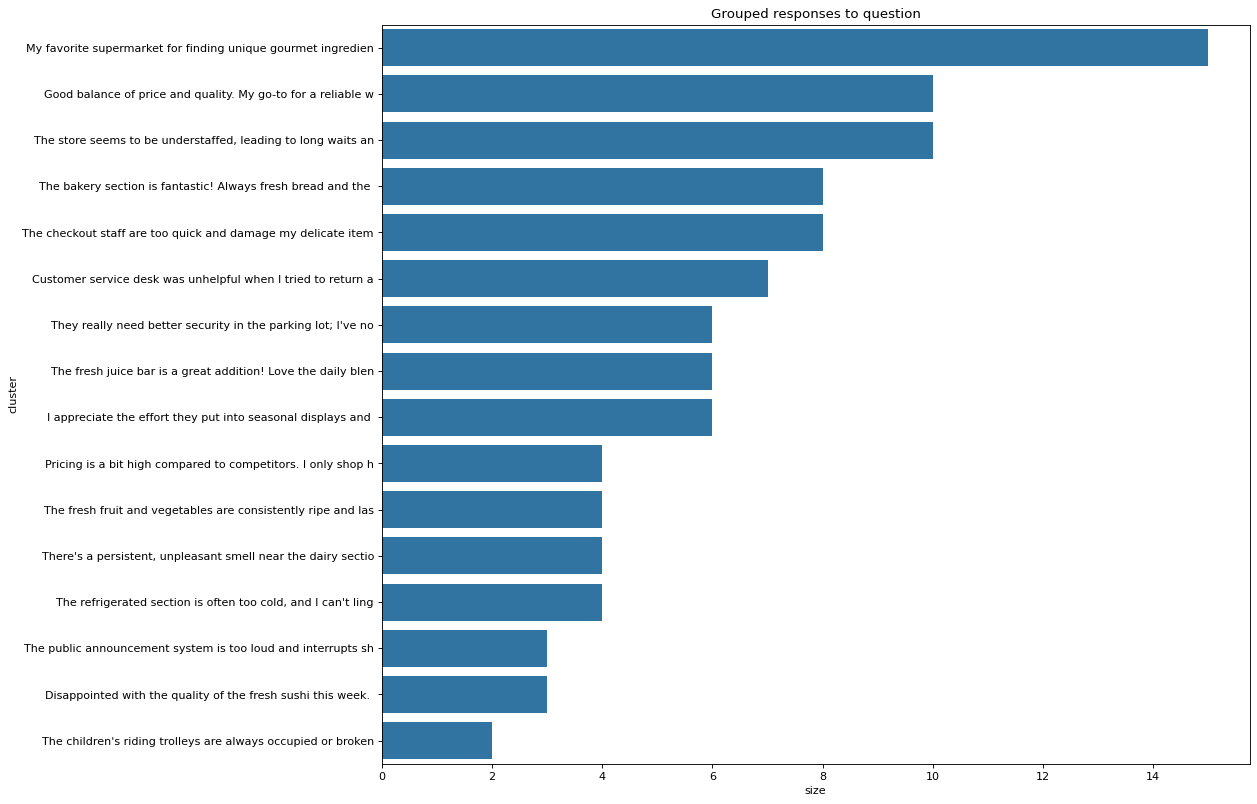

In [15]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

figure(figsize=(14, 12), dpi=80)
sns.barplot(y="cluster", x="size", data = df_cluster_overview)
plt.title("Grouped responses to question")
plt.savefig("clusters.png")

In [36]:
question_no_to_cluster_name = [None] * len(q2)
question_no_to_cluster_id = [None] * len(q2)
for cluster_id, cluster in enumerate(match_response_2.clusters):
    print (f"Cluster #{cluster.cluster_id}: {cluster.text_description}")
    print (f"Keywords: {cluster.keywords}")
    for item_id in cluster.item_ids:
        question_no_to_cluster_name[item_id] = cluster.text_description
        question_no_to_cluster_id[item_id] = cluster_id

Cluster #0: The bakery section is fantastic! Always fresh bread and the staff are very friendly and helpful.
Keywords: ['friendly', 'bread', 'bakery', 'counter', 'efficient']
Cluster #1: Pricing is a bit high compared to competitors. I only shop here for specific sale items.
Keywords: ['six', 'crept']
Cluster #2: Customer service desk was unhelpful when I tried to return an item. Poor experience.
Keywords: ['returns', 'policy', 'item']
Cluster #3: The fresh fruit and vegetables are consistently ripe and last a long time after purchase.
Keywords: ['fruit', 'consistently', 'beautifully', 'displayed', 'market']
Cluster #4: They really need better security in the parking lot; I've noticed suspicious activity.
Keywords: ['lot', 'better', 'parking', 'lifesaver', 'play']
Cluster #5: The fresh juice bar is a great addition! Love the daily blends.
Keywords: ['coffee', 'craft', 'ciders', 'beers', 'town']
Cluster #6: I appreciate the effort they put into seasonal displays and product offerings.
K

In [37]:
import numpy as np
all_embeddings = np.asarray([match_response_2.new_vectors_dict[q] for q in q2])

In [38]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import plotly.express as px

# --- 0. Sample Data Setup (Replace with your actual data) ---



# Create a DataFrame for easy manipulation and Plotly input
df = pd.DataFrame({
    'Question_Text': q2,
    'Cluster_Name': question_no_to_cluster_name,
        'Cluster_Id': question_no_to_cluster_id,
    'Embedding': list(all_embeddings)
})

# --- 1. Turn the embeddings into a 2D representation with t-SNE ---
# 
tsne = TSNE(
    n_components=2, 
    random_state=42, 
    perplexity=min(5, len(all_embeddings) - 1) if len(all_embeddings) > 1 else 1 # Adjust perplexity as needed
)
tsne_results = tsne.fit_transform(all_embeddings)

df['tSNE-1'] = tsne_results[:, 0]
df['tSNE-2'] = tsne_results[:, 1]

# --- 2. & 3. Plot all texts on a 2D scatter graph, colour coded by cluster ---

In [39]:
df

,Question_Text,Cluster_Name,Cluster_Id,Embedding,tSNE-1,tSNE-2
0,The bakery section is fantastic! Always fresh ...,The bakery section is fantastic! Always fresh ...,0,"[-0.08111782, -0.062990375, -0.06729508, 0.021...",-25.378321,-2.835178
1,Pricing is a bit high compared to competitors....,Pricing is a bit high compared to competitors....,1,"[0.124444485, 0.045408998, -0.022309728, 0.105...",-7.376915,6.663337
2,I wish they had more organic produce options. ...,My favorite supermarket for finding unique gou...,13,"[-0.015106699, 0.22616765, 0.13532144, -0.0987...",25.648535,-14.790306
3,"Checkout lines are consistently long, even dur...",The checkout staff are too quick and damage my...,15,"[-0.03598307, -0.30042848, -0.23755527, 0.2513...",-7.872078,19.447393
4,The store is always clean and well-organized. ...,Good balance of price and quality. My go-to fo...,8,"[0.21919294, 0.09861165, 0.009806277, 0.171187...",-5.648140,-10.817294
...,...,...,...,...,...,...
95,The lighting in the freezer section makes it h...,"The refrigerated section is often too cold, an...",12,"[-0.283312, 0.061750397, -0.019467112, 0.44884...",15.696451,13.148638
96,The employees genuinely seem to enjoy their jo...,The bakery section is fantastic! Always fresh ...,0,"[0.04445997, -0.061517227, -0.08852468, 0.0307...",-19.168995,19.121332
97,The price tags are often missing or placed on ...,Pricing is a bit high compared to competitors....,1,"[-0.19624768, 0.13020454, 0.048626058, 0.31891...",-7.832241,8.901721
98,Excellent selection of craft beers and ciders—...,The fresh juice bar is a great addition! Love ...,5,"[-0.015593308, -0.14285563, -0.022107033, 0.20...",-13.631615,-6.462463


In [40]:
import matplotlib.pyplot as plt

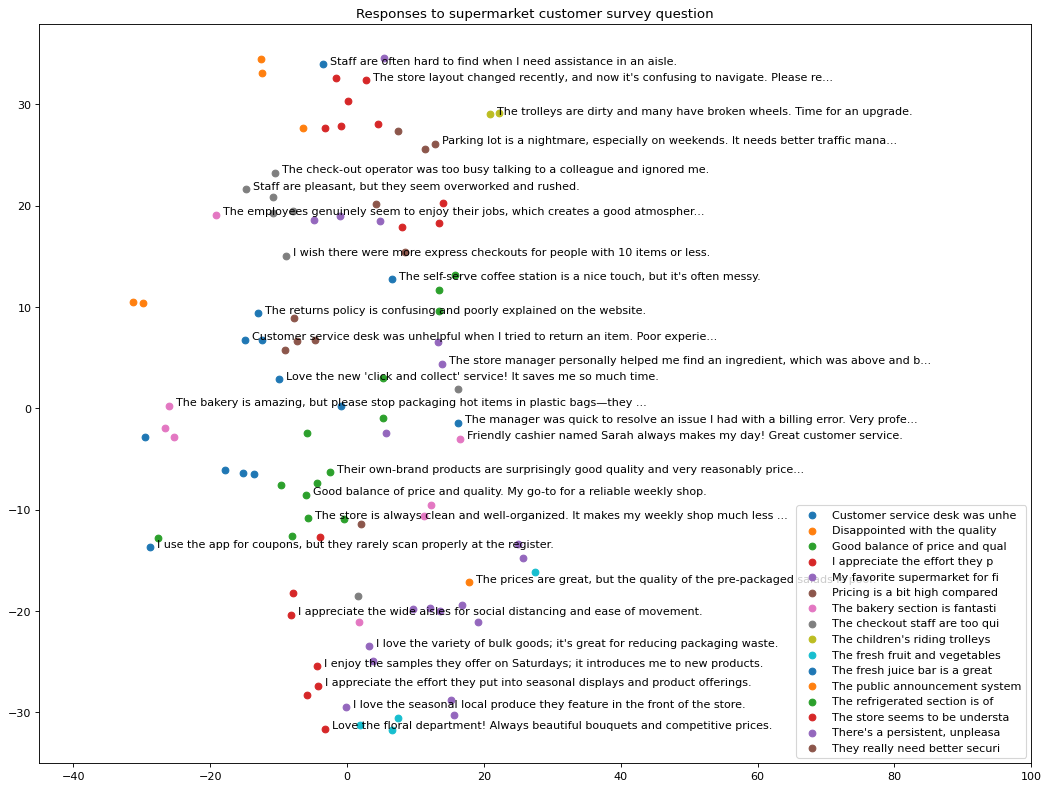

In [41]:
import random
from matplotlib.pyplot import figure

figure(figsize=(16, 12), dpi=80)
import re

coords_already_annotated = set()

for cluster_name, subset in df.groupby("Cluster_Name"):
    cluster_name_short = cluster_name
    if len(cluster_name_short) > 30:
        cluster_name_short = cluster_name_short[:30]
    plt.scatter(subset['tSNE-1'], subset['tSNE-2'], label=cluster_name_short)

    for i in range(len(subset)):
        x = subset["tSNE-1"].iloc[i] 
        y = subset["tSNE-2"].iloc[i] 
        text = subset["Question_Text"].iloc[i]
        if len(text) > 80:
            text = text[:80] + "..."
        # if subset["Question_Text"].iloc[i] == cluster_name:
        #     plt.annotate(text, ( x,y))
        # else:
        should_annotate = True
        margin = 1.5
        for old_x, old_y in coords_already_annotated:
            if old_y > y - margin and old_y < y + margin:
                should_annotate = False
        if should_annotate:
            plt.annotate("  " + text, ( x,y), )
            coords_already_annotated.add((x, y))

plt.xlim(-45, 100)
plt.title("Responses to supermarket customer survey question")

plt.legend()

plt.savefig("tsne.png")

Ideas for next steps: can we use GPT to come up with a brief summary of each cluster?

In [49]:
import os

import requests

headers = {
    'Authorization': 'Bearer ' + os.getenv('OPENAI_API_KEY', ''),
}


In [52]:
cluster_id_to_openai_title = {}
for cluster_id, questions_in_cluster in df.groupby("Cluster_Id"):
    all_inputs = []

    all_inputs.append(
        {
            'role': 'system',
            'content': "Give a topic title for the following list of survey responses. Do not give any other output."
        })
    for q in set(questions_in_cluster.Question_Text):
        all_inputs.append(
        {
            'role': 'user',
            'content': q
        })
        
    json_data = {
        'model': 'gpt-4.1',
        'input': all_inputs
    }

    response = requests.post('https://api.openai.com/v1/responses', headers=headers, json=json_data)

    openai_title = response.json()["output"][0]["content"][0]["text"]
    print (f"Title for cluster {cluster_id}: [{openai_title}]")
    cluster_id_to_openai_title[cluster_id] = openai_title

Title for cluster 0: [Customer Feedback on Store Departments and Staff Service]
Title for cluster 1: [Customer Feedback on Store Pricing and Value]
Title for cluster 2: [Customer Service and In-Store Experience Feedback]
Title for cluster 3: [Customer Opinions on the Produce Department]
Title for cluster 4: [Customer Feedback on Store Safety, Cleanliness, and Facilities]
Title for cluster 5: [Feedback on Food and Beverage Offerings]
Title for cluster 6: [Customer Appreciations and Preferences in Supermarket Shopping Experience]
Title for cluster 7: [Trolley Condition and Availability]
Title for cluster 8: [Customer Experiences and Feedback on Local Grocery Store]
Title for cluster 9: [Customer Feedback on Store Layout and Cleanliness]
Title for cluster 10: [Customer Experience Improvement Feedback]
Title for cluster 11: [Customer Feedback on Grocery Store Product Availability and Quality]
Title for cluster 12: [Customer Feedback on Grocery Store Frozen and Refrigerated Sections]
Title 

In [57]:
cluster_id_to_openai_title_cleaned = {}
for cluster_id, title_messy in cluster_id_to_openai_title.items():
    title_cleaned = re.sub(r'(?i)(?:(?:Customer )?Feedback on |Customer Appreciations and Preferences in |Customer Opinions on |Customer Experiences and Feedback (?:on|Regarding) | Feedback$| Experience$)', '', title_messy)
    cluster_id_to_openai_title_cleaned[cluster_id] = title_cleaned

In [58]:
print (json.dumps(cluster_id_to_openai_title_cleaned, indent=4))

{
    "0": "Store Departments and Staff Service",
    "1": "Store Pricing and Value",
    "2": "Customer Service and In-Store Experience",
    "3": "the Produce Department",
    "4": "Store Safety, Cleanliness, and Facilities",
    "5": "Food and Beverage Offerings",
    "6": "Supermarket Shopping",
    "7": "Trolley Condition and Availability",
    "8": "Local Grocery Store",
    "9": "Store Layout and Cleanliness",
    "10": "Customer Experience Improvement",
    "11": "Grocery Store Product Availability and Quality",
    "12": "Grocery Store Frozen and Refrigerated Sections",
    "13": "Supermarket Shopping Experience and Product Selection",
    "14": "Store Environment and Shopping",
    "15": "Checkout Process and Staff at the Grocery Store"
}


In [59]:
df["openai_cluster"] = df.Cluster_Id.map(cluster_id_to_openai_title_cleaned)

In [74]:
df.to_excel("bakery_survey_clustered_with_openai_cluster_labels.xlsx", index=False)

In [75]:
df

,Question_Text,Cluster_Name,Cluster_Id,Embedding,tSNE-1,tSNE-2,openai_cluster
0,The bakery section is fantastic! Always fresh ...,The bakery section is fantastic! Always fresh ...,0,"[-0.08111782, -0.062990375, -0.06729508, 0.021...",-25.378321,-2.835178,Store Departments and Staff Service
1,Pricing is a bit high compared to competitors....,Pricing is a bit high compared to competitors....,1,"[0.124444485, 0.045408998, -0.022309728, 0.105...",-7.376915,6.663337,Store Pricing and Value
2,I wish they had more organic produce options. ...,My favorite supermarket for finding unique gou...,13,"[-0.015106699, 0.22616765, 0.13532144, -0.0987...",25.648535,-14.790306,Supermarket Shopping Experience and Product Se...
3,"Checkout lines are consistently long, even dur...",The checkout staff are too quick and damage my...,15,"[-0.03598307, -0.30042848, -0.23755527, 0.2513...",-7.872078,19.447393,Checkout Process and Staff at the Grocery Store
4,The store is always clean and well-organized. ...,Good balance of price and quality. My go-to fo...,8,"[0.21919294, 0.09861165, 0.009806277, 0.171187...",-5.648140,-10.817294,Local Grocery Store
...,...,...,...,...,...,...,...
95,The lighting in the freezer section makes it h...,"The refrigerated section is often too cold, an...",12,"[-0.283312, 0.061750397, -0.019467112, 0.44884...",15.696451,13.148638,Grocery Store Frozen and Refrigerated Sections
96,The employees genuinely seem to enjoy their jo...,The bakery section is fantastic! Always fresh ...,0,"[0.04445997, -0.061517227, -0.08852468, 0.0307...",-19.168995,19.121332,Store Departments and Staff Service
97,The price tags are often missing or placed on ...,Pricing is a bit high compared to competitors....,1,"[-0.19624768, 0.13020454, 0.048626058, 0.31891...",-7.832241,8.901721,Store Pricing and Value
98,Excellent selection of craft beers and ciders—...,The fresh juice bar is a great addition! Love ...,5,"[-0.015593308, -0.14285563, -0.022107033, 0.20...",-13.631615,-6.462463,Food and Beverage Offerings


In [70]:
df_cluster_overview_openai = df.groupby("openai_cluster")["Cluster_Id"].count().reset_index() \
    .rename(columns={"Cluster_Id":"size"}).sort_values("size", ascending=False)
df_cluster_overview_openai

,openai_cluster,size
13,Supermarket Shopping Experience and Product Se...,15
6,Local Grocery Store,10
8,Store Environment and Shopping,10
0,Checkout Process and Staff at the Grocery Store,8
7,Store Departments and Staff Service,8
2,Customer Service and In-Store Experience,7
3,Food and Beverage Offerings,6
11,"Store Safety, Cleanliness, and Facilities",6
12,Supermarket Shopping,6
4,Grocery Store Frozen and Refrigerated Sections,4


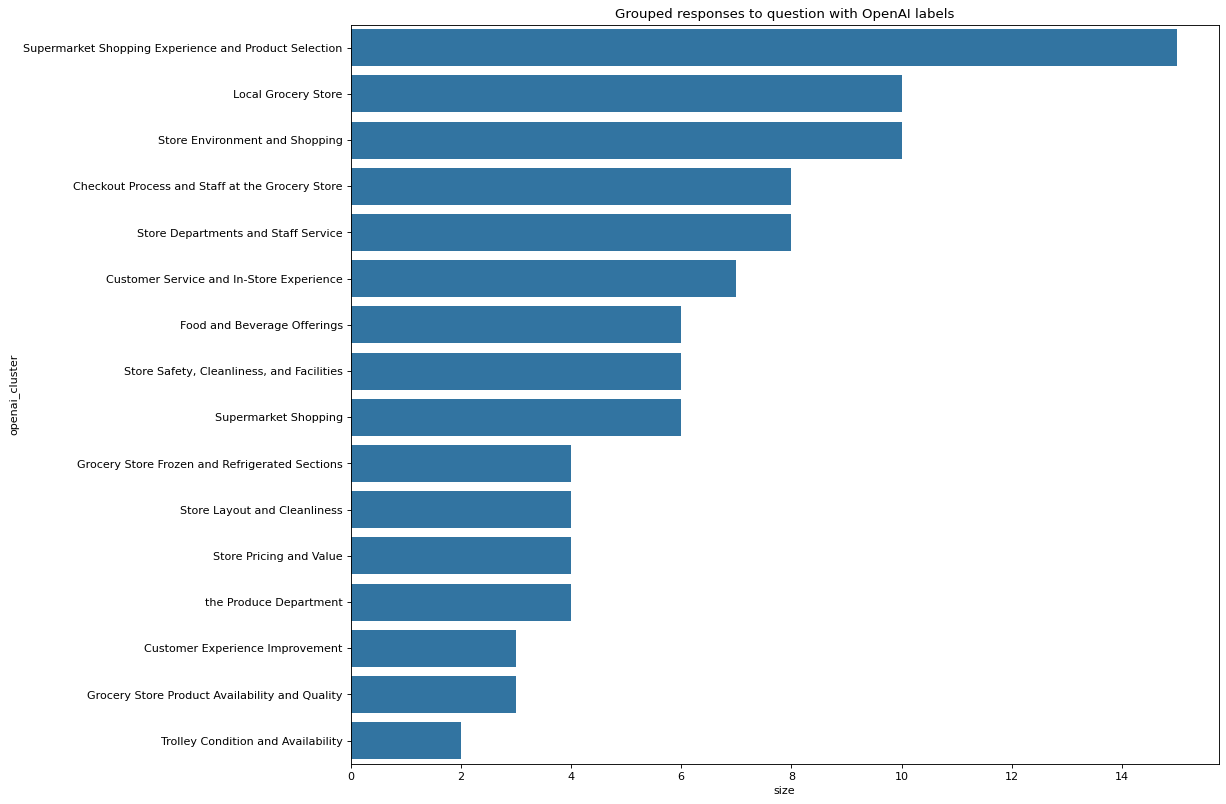

In [72]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

figure(figsize=(14, 12), dpi=80)
sns.barplot(y="openai_cluster", x="size", data = df_cluster_overview_openai)
plt.title("Grouped responses to question with OpenAI labels")
plt.savefig("clusters.png")